# THE SPARKS FOUNDATION

# GRADUATE ROTATIONAL INTERNSHIP PROGRAM- GRIP 

# DOMAIN: DATA SCIENCE & BUSINESS ANALYTICS

# AUTHOR: KUMUD KUMAR

## TASK1: Prediction of marks using Supervised Learning

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#reading source file
df=pd.read_csv("Task1.csv")

In [3]:
# checking sample data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Cleaning

In [4]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {df.shape}")
totalrows=df.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (25, 2)
 Total number of rows in the dataset =  25


In [5]:
# checking for null values
df.isnull().sum()

# No null values found

Hours     0
Scores    0
dtype: int64

In [6]:
# checking for duplicates
df.duplicated().sum()


0

### 1. No null values in data
### 2. No duplicates in dataset
### 3. There are 25 rows and 2 columns in dataset

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Mean of Hours and Scores are above median values. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### EDA

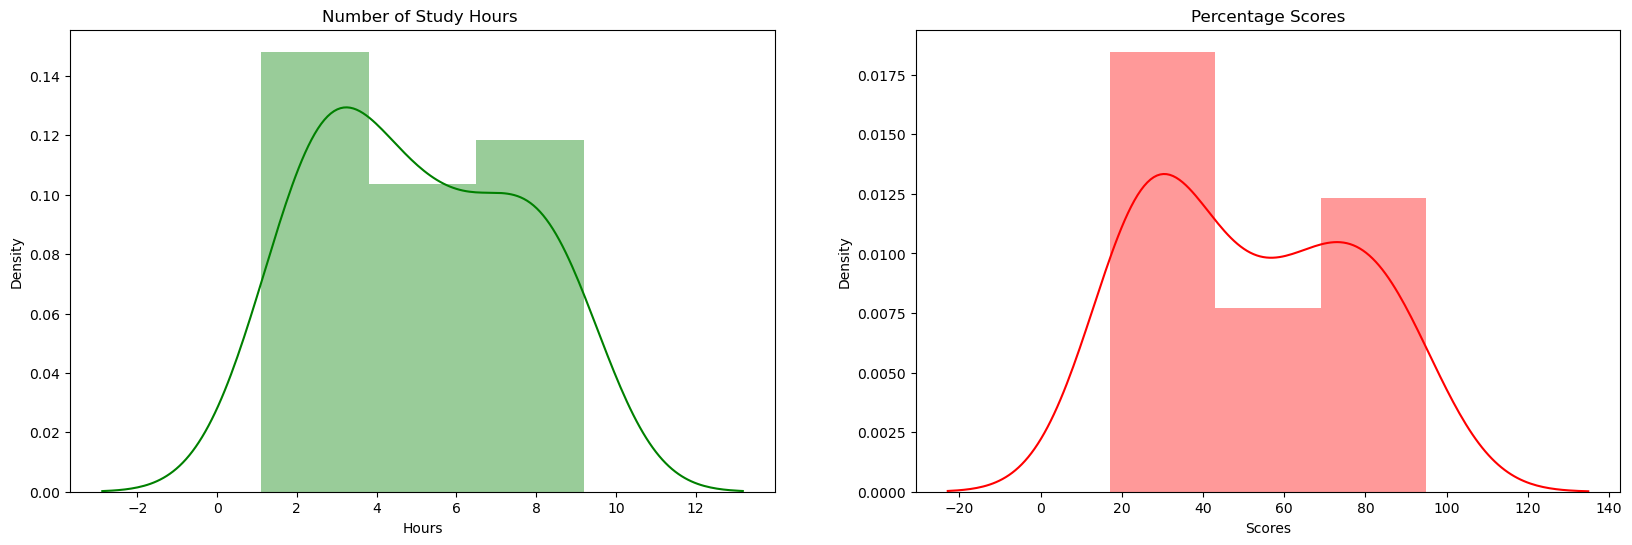

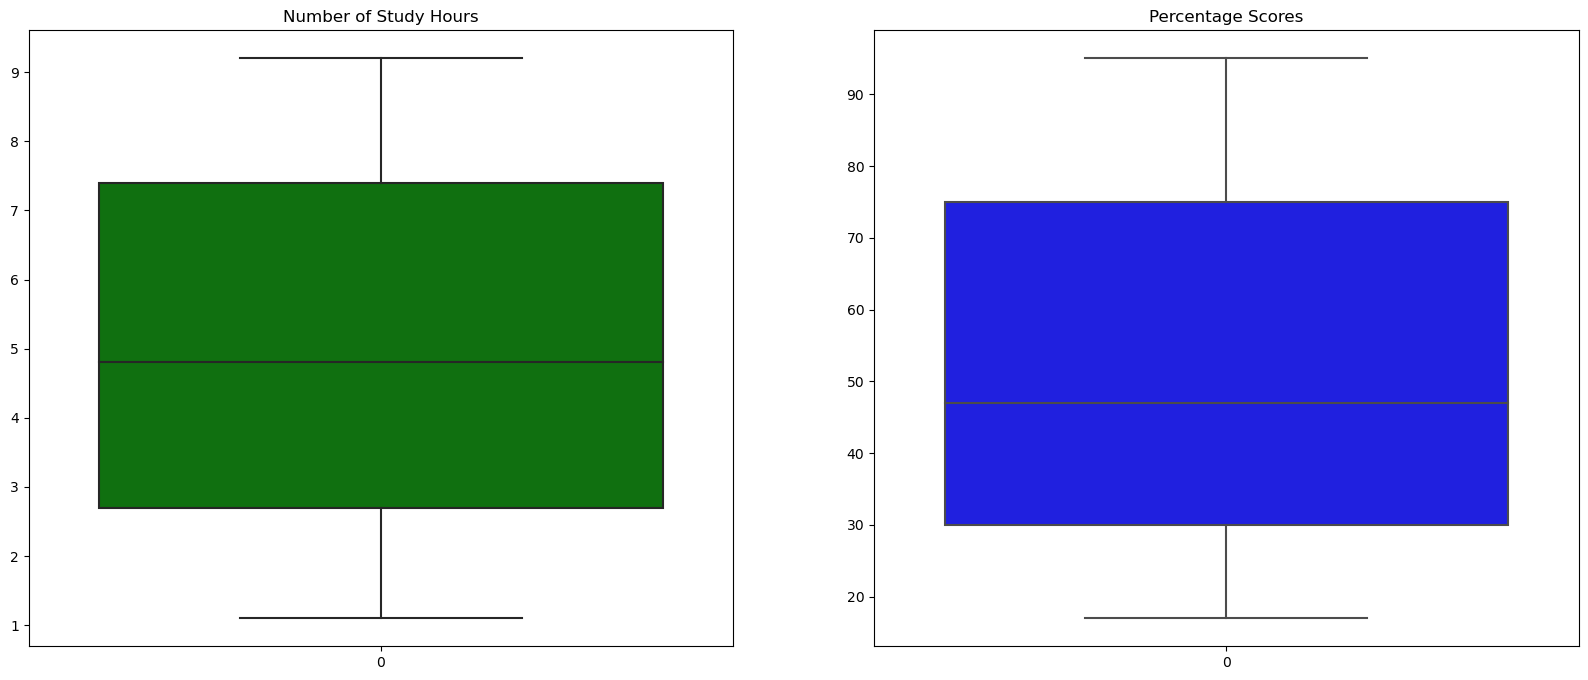

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('Number of Study Hours ')
sns.distplot(df['Hours'],color='green')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Percentage Scores')
sns.distplot(df['Scores'],color='red')


plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title('Number of Study Hours')
sns.boxplot(df['Hours'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Percentage Scores')
sns.boxplot(df['Scores'],orient='vertical',color='blue')


plt.show()

#### Most likely hours spend on studying by student is 5 hrs.
#### Almost half of the students score around 50%. 

In [10]:
# correlation matrix
rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(2, 2))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


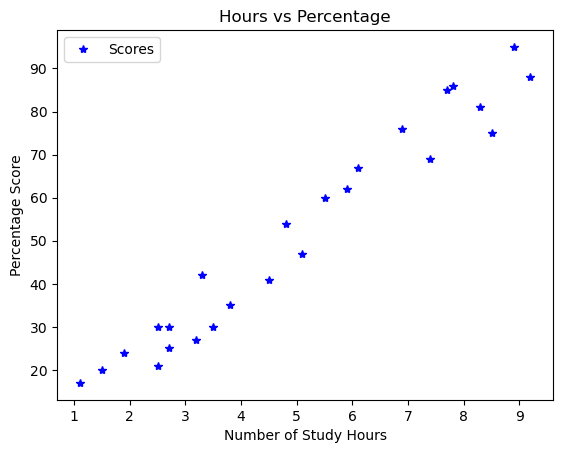

In [11]:
# Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='*', color='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Study Hours')  
plt.ylabel('Percentage Score')  
#plt.figure(figsize=(20,5))
plt.show()

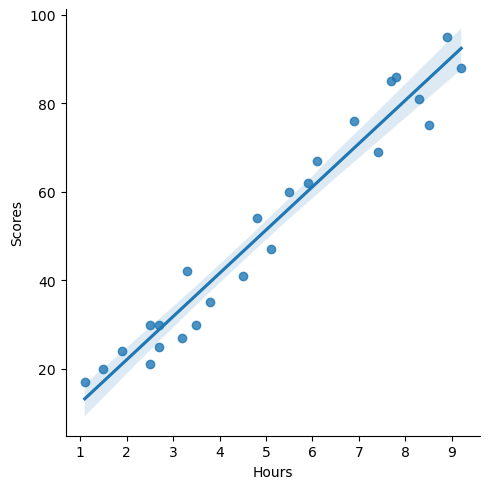

In [12]:
# plotting the linear regression line 
sns.lmplot(x='Hours',y='Scores',data=df)
#plt.figure(figsize=(20,5))
plt.show()

#### There is a positive correlation between Scores and hours studied. 

### Data Preparation

In [13]:
# Dividing data into input and target column
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values # passing values for target variable 

In [14]:
# Importing train test split from model selection
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### Model Building

In [15]:
# After spliting data into train and test set, we will now train the model using liner regression algorithm
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 
print("Training Algo completed")

Training Algo completed


In [16]:
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas

2.3708153823418883
[9.78856669]


#### Prediction Model

In [17]:
#make prediction
pred=lm.predict(X_test)
df_pred= pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df_pred

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [18]:
# we can also predict for input data
input_num=8.5
input_hours = np.array([[input_num]])
input_pred = lm.predict(input_hours)
print("No of Hours = {}".format(input_num))
print("Predicted Score = {}".format(input_pred[0]))

No of Hours = 8.5
Predicted Score = 85.57363221970877


#### Evaluating Model

In [19]:
#linear regression modelscore
lm.score(X_train, y_train)

0.9484997422695115

In [20]:
#see the error parameters
from sklearn import metrics
print("Mean absolute Error :", metrics.mean_absolute_error(y_test,pred))

from sklearn.metrics import r2_score
print("r2_score  :", r2_score(y_test, pred))


Mean absolute Error : 4.419727808027651
r2_score  : 0.9568211104435257
